# Simple Linear Reegression Model (poverty-internet)
### Author : MD. Mehedi Hassan Galib
### Date :  01 August, 2020

<br/>
<br/>
<br/>

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Load the dataset

In [2]:
df = pd.read_csv("C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/in1.csv")
df.head()

,State,Year,Internet Usage Household,Bachelors Degree or Up,GDPpcGrowth,unemployment,Population,FarmEmploy,Forest&FishEmploy,Mining Employ,...,White,Black,NativeAmeri,Asian,PacificIslander,Other,Hispanic,SalesTax,LandArea,PovertyRate
0,Alabama,2010,61.7,22.0,-0.29,3.8,4785401,50168,14919,12015,...,0.695,0.264,0.006,0.011,0.000,0.011,0.038,4.00,"50,644",17.2
1,Alaska,2010,83.4,26.6,-3.50,9.3,714146,755,12069,17816,...,0.674,0.035,0.146,0.055,0.011,0.009,0.057,0.00,"570,665",12.5
2,Arizona,2010,74.3,25.6,-2.46,8.0,6413158,26348,15652,17977,...,0.794,0.041,0.045,0.027,0.002,0.064,0.298,5.60,"113,595",18.8
3,Arkansas,2010,63.4,18.9,0.75,10.4,2921588,56100,13849,16789,...,0.784,0.159,0.006,0.011,0.002,0.021,0.063,6.00,"52,030",15.3
4,California,2010,75.6,29.9,-0.97,7.9,37338198,237455,213933,60398,...,0.624,0.060,0.008,0.131,0.004,0.131,0.377,7.25,"155,766",16.3


## Reconnaissance

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     51 non-null     object 
 1   Year                      51 non-null     int64  
 2   Internet Usage Household  51 non-null     float64
 3   Bachelors Degree or Up    51 non-null     float64
 4   GDPpcGrowth               51 non-null     float64
 5   unemployment              51 non-null     float64
 6   Population                51 non-null     int64  
 7   FarmEmploy                51 non-null     int64  
 8   Forest&FishEmploy         51 non-null     int64  
 9   Mining Employ             51 non-null     int64  
 10  UtilitiesEmploy           51 non-null     int64  
 11  ConstructionEmploy        51 non-null     int64  
 12  ManufactureEmploy         51 non-null     int64  
 13  WholesaleTradeEmploy      51 non-null     int64  
 14  RetailTradeE

In [4]:
df.describe()

,Year,Internet Usage Household,Bachelors Degree or Up,GDPpcGrowth,unemployment,Population,FarmEmploy,Forest&FishEmploy,Mining Employ,UtilitiesEmploy,...,TwoOrMoreRace,White,Black,NativeAmeri,Asian,PacificIslander,Other,Hispanic,SalesTax,PovertyRate
count,51.0,51.000000,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,2010.0,73.747059,27.590196,0.278039,8.754902,6.065298e+06,52098.039216,16580.431373,24906.470588,11415.686275,...,0.029667,0.772882,0.111275,0.015961,0.036804,0.003098,0.030255,0.106000,5.003922,14.256863
std,0.0,6.304422,5.555367,2.872476,2.031779,6.839909e+06,50523.121541,30638.611280,56817.794904,12081.788877,...,0.032135,0.136765,0.110911,0.028629,0.055790,0.013881,0.027747,0.099308,1.958573,3.418436
min,2010.0,56.600000,17.300000,-8.260000,3.800000,5.645540e+05,0.000000,72.000000,433.000000,1181.000000,...,0.011000,0.246000,0.005000,0.002000,0.006000,0.000000,0.002000,0.012000,0.000000,6.500000
25%,2010.0,69.500000,24.200000,-1.115000,7.400000,1.700622e+06,16055.500000,5020.000000,4199.500000,3471.000000,...,0.019000,0.696000,0.031000,0.003000,0.012000,0.000000,0.011000,0.043500,4.000000,11.350000
50%,2010.0,75.000000,26.500000,0.230000,8.500000,4.347223e+06,45490.000000,11376.000000,11819.000000,8015.000000,...,0.023000,0.793000,0.072000,0.005000,0.023000,0.000000,0.021000,0.082000,5.750000,14.300000
75%,2010.0,77.600000,30.550000,1.435000,10.150000,6.649208e+06,76324.500000,14501.000000,24161.500000,13198.500000,...,0.027000,0.865500,0.157000,0.011500,0.038000,0.001000,0.038500,0.121500,6.000000,16.650000
max,2010.0,84.700000,48.500000,9.450000,13.800000,3.733820e+07,262341.000000,213933.000000,396360.000000,59397.000000,...,0.238000,0.954000,0.512000,0.146000,0.389000,0.099000,0.131000,0.464000,7.250000,22.500000


In [5]:
df.isnull().sum()

State                       0
Year                        0
Internet Usage Household    0
Bachelors Degree or Up      0
GDPpcGrowth                 0
unemployment                0
Population                  0
FarmEmploy                  0
Forest&FishEmploy           0
Mining Employ               0
UtilitiesEmploy             0
ConstructionEmploy          0
ManufactureEmploy           0
WholesaleTradeEmploy        0
RetailTradeEmploy           0
TransportEmploy             0
InfoOther1                  0
InfoOther2                  0
InfoOther3                  0
ITEmploy1                   0
ITEmploy2                   0
InfoOther4                  0
FinanceInsuranceEmploy      0
RealtyEmploy                0
ProfTechEmploy              0
ManagementEmploy            0
AdminEmploy                 0
EducationEmploy             0
HealthcareEmploy            0
ArtsEmploy                  0
AccomFoodEmploy             0
OtherEmploy                 0
GovernmentEmploy            0
AvgWage   

In [6]:
df.columns

Index(['State', 'Year', 'Internet Usage Household', 'Bachelors Degree or Up',
       'GDPpcGrowth', 'unemployment', 'Population', 'FarmEmploy',
       'Forest&FishEmploy', 'Mining Employ', 'UtilitiesEmploy',
       'ConstructionEmploy', 'ManufactureEmploy', 'WholesaleTradeEmploy',
       'RetailTradeEmploy', 'TransportEmploy', 'InfoOther1', 'InfoOther2',
       'InfoOther3', 'ITEmploy1', 'ITEmploy2', 'InfoOther4',
       'FinanceInsuranceEmploy', 'RealtyEmploy', 'ProfTechEmploy',
       'ManagementEmploy', 'AdminEmploy', 'EducationEmploy',
       'HealthcareEmploy', 'ArtsEmploy', 'AccomFoodEmploy', 'OtherEmploy',
       'GovernmentEmploy', 'AvgWage', 'PersonalIncomePC', 'TaxesAll', 'Male',
       'Female', '18YearsOlder', '21YearsOlder', '62YearsOlder',
       '65YearsOlder', 'TwoOrMoreRace', 'White', 'Black', 'NativeAmeri',
       'Asian', 'PacificIslander', 'Other', 'Hispanic', 'SalesTax', 'LandArea',
       'PovertyRate'],
      dtype='object')

## Renaming column names

In [11]:
df.rename(columns = {'Bachelors Degree or Up' : 'wd'}, inplace = True)
df.rename(columns = {'Internet Usage Household' : 'intr'}, inplace = True)
df.head()

,State,Year,intr,wd,GDPpcGrowth,unemployment,Population,FarmEmploy,Forest&FishEmploy,Mining Employ,...,White,Black,NativeAmeri,Asian,PacificIslander,Other,Hispanic,SalesTax,LandArea,PovertyRate
0,Alabama,2010,61.7,22.0,-0.29,3.8,4785401,50168,14919,12015,...,0.695,0.264,0.006,0.011,0.000,0.011,0.038,4.00,"50,644",17.2
1,Alaska,2010,83.4,26.6,-3.50,9.3,714146,755,12069,17816,...,0.674,0.035,0.146,0.055,0.011,0.009,0.057,0.00,"570,665",12.5
2,Arizona,2010,74.3,25.6,-2.46,8.0,6413158,26348,15652,17977,...,0.794,0.041,0.045,0.027,0.002,0.064,0.298,5.60,"113,595",18.8
3,Arkansas,2010,63.4,18.9,0.75,10.4,2921588,56100,13849,16789,...,0.784,0.159,0.006,0.011,0.002,0.021,0.063,6.00,"52,030",15.3
4,California,2010,75.6,29.9,-0.97,7.9,37338198,237455,213933,60398,...,0.624,0.060,0.008,0.131,0.004,0.131,0.377,7.25,"155,766",16.3


## Converting to DataFrame

In [16]:
intr = pd.DataFrame(df['intr'])
PovertyRate = pd.DataFrame(df['PovertyRate'])

## Seeing the relation between variables

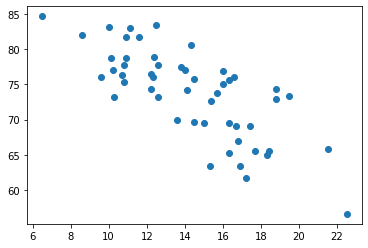

In [14]:
plt.scatter(PovertyRate, intr)
plt.show()

In [17]:
df.corr()

,Year,intr,wd,GDPpcGrowth,unemployment,Population,FarmEmploy,Forest&FishEmploy,Mining Employ,UtilitiesEmploy,...,TwoOrMoreRace,White,Black,NativeAmeri,Asian,PacificIslander,Other,Hispanic,SalesTax,PovertyRate
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intr,NaN,1.000000,0.595227,0.090682,0.129623,-0.032152,-0.257898,-0.007208,-0.289018,-0.130444,...,0.207104,0.115364,-0.403278,-0.030118,0.304944,0.169360,0.130622,0.050390,-0.220498,-0.753595
wd,NaN,0.595227,1.000000,0.088024,0.096600,0.044819,-0.193515,-0.008483,-0.156119,-0.001639,...,0.079467,-0.280757,0.170311,-0.149028,0.240324,0.040731,0.257862,0.124004,-0.064078,-0.388403
GDPpcGrowth,NaN,0.090682,0.088024,1.000000,0.298019,-0.005640,0.096076,-0.010693,0.024249,-0.011664,...,-0.175579,0.140524,0.046263,-0.278615,-0.110330,-0.121228,-0.111030,-0.198817,-0.120857,0.000042
unemployment,NaN,0.129623,0.096600,0.298019,1.000000,-0.020169,0.024078,-0.008855,-0.061803,-0.036772,...,0.065562,0.019543,-0.044072,-0.083994,0.044084,0.094686,-0.046052,-0.074232,-0.229990,-0.116678
Population,NaN,-0.032152,0.044819,-0.005640,-0.020169,1.000000,0.783268,0.813390,0.474568,0.962625,...,-0.070852,-0.207305,0.116662,-0.239512,0.174993,-0.098756,0.581999,0.528248,0.295641,0.232605
FarmEmploy,NaN,-0.257898,-0.193515,0.096076,0.024078,0.783268,1.000000,0.710426,0.667945,0.790180,...,-0.078796,0.012367,-0.034738,-0.161328,0.024848,-0.115414,0.346793,0.375584,0.272334,0.239080
Forest&FishEmploy,NaN,-0.007208,-0.008483,-0.010693,-0.008855,0.813390,0.710426,1.000000,0.278814,0.717043,...,0.012094,-0.151356,-0.022914,-0.081889,0.200127,-0.029406,0.521246,0.470219,0.188953,0.181331
Mining Employ,NaN,-0.289018,-0.156119,0.024249,-0.061803,0.474568,0.667945,0.278814,1.000000,0.580982,...,-0.008467,-0.041606,0.000555,0.012914,-0.026113,-0.056481,0.280972,0.432141,0.096031,0.279027
UtilitiesEmploy,NaN,-0.130444,-0.001639,-0.011664,-0.036772,0.962625,0.790180,0.717043,0.580982,1.000000,...,-0.076223,-0.217098,0.149164,-0.218406,0.144711,-0.105554,0.548424,0.500495,0.267868,0.284064


## Splitting

## R-squared value

In [18]:
X_train, X_test, y_train, y_test = train_test_split(PovertyRate, intr, test_size = 0.3)

## Model

In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(PovertyRate, intr)

## Prediction

In [20]:
pred = model.predict(X_test)
pred

array([[70.07359481],
       [77.43959869],
       [69.6566512 ],
       [68.96174517],
       [78.69042953],
       [74.10404976],
       [78.41246712],
       [62.29064733],
       [80.21922279],
       [70.35155722],
       [70.90748204],
       [73.40914374],
       [76.18876784],
       [66.46008348],
       [79.66329797],
       [70.21257602]])

## Plotting the model

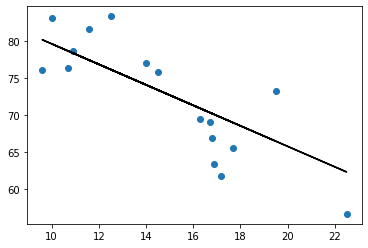

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred,color = "Black")
plt.show()

## Model Evaluation:

## R-squared value

In [22]:
model.score(PovertyRate, intr)

0.5679058623878812

## Absolute percentage error

In [23]:
np.mean((abs(y_test-pred)/y_test)*100)

intr    5.660542
dtype: float64

## Mean squared error (sklearn)

In [24]:
mse = mean_squared_error(y_test,pred)
mse

20.74253760384739